# Diabetes Predictor

In [1]:
import numpy as np 
import pandas as pd

from sklearn import metrics
import sklearn.model_selection as ms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import sklearn.naive_bayes as NB
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

## Load and process Data

In [2]:
data = pd.read_csv('data/diabetes.csv', header=0)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.shape

(768, 9)

In [6]:
data['BMI'] = data['BMI'].astype(int)
data['DiabetesPedigreeFunction'] = data['DiabetesPedigreeFunction'].astype(int)

In [7]:
features = list(data.columns[:8])
features

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [8]:
X = data.iloc[:,0:7]
y = data['Outcome']

## Radom Forest Classifier

In [9]:
print("Random forest Classifier")
model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)
model = model.fit(X_train,y_train)
kfold = ms.StratifiedKFold(n_splits=10)
rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print ("Random Forest = ", rf_roc_auc)
predCV = ms.cross_val_predict(model, X_test, y_test, cv=kfold)
print("prediction cross validation", predCV)                                
precisionVal = metrics.precision_score(y_test,predCV)
print("Precision value", precisionVal)
recallVal = metrics.recall_score(y_test,predCV)
print("Recall value", recallVal)
f1Val = metrics.f1_score(y_test,predCV)
print("f1 value", f1Val)
KappaVal = metrics.cohen_kappa_score(y_test, predCV)
print("Kappa value", KappaVal)
Accuracy= metrics.accuracy_score(y_test,predCV )
print("Accuracy", Accuracy)
print(metrics.classification_report(y_test,model.predict(X_test)))

Random forest Classifier
Random Forest =  0.758552631579
prediction cross validation [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0
 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0]
Precision value 0.710526315789
Recall value 0.675
f1 value 0.692307692308
Kappa value 0.536617842876
Accuracy 0.793103448276
             precision    recall  f1-score   support

          0       0.83      0.84      0.84        76
          1       0.69      0.68      0.68        40

avg / total       0.78      0.78      0.78       116



## KNN

In [10]:
print("KNN")
model = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)
model = model.fit(X_train,y_train)
kfold = ms.StratifiedKFold(n_splits=10)
rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print ("KNN= ", rf_roc_auc)
predCV = ms.cross_val_predict(model, X_test, y_test, cv=kfold)
print("prediction cross validation", predCV)                                
precisionVal = metrics.precision_score(y_test,predCV)
print("Precision value", precisionVal)
recallVal = metrics.recall_score(y_test,predCV)
print("Recall value", recallVal)
f1Val = metrics.f1_score(y_test,predCV)
print("f1 value", f1Val)
KappaVal = metrics.cohen_kappa_score(y_test, predCV)
print("Kappa value", KappaVal)
Accuracy= metrics.accuracy_score(y_test,predCV )
print("Accuracy", Accuracy)
print(metrics.classification_report(y_test,model.predict(X_test)))

KNN
KNN=  0.651973684211
prediction cross validation [0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 1 0]
Precision value 0.527777777778
Recall value 0.475
f1 value 0.5
Kappa value 0.257412398922
Accuracy 0.672413793103
             precision    recall  f1-score   support

          0       0.75      0.83      0.79        76
          1       0.59      0.47      0.53        40

avg / total       0.70      0.71      0.70       116



## Logistic Regression

In [11]:
print("Logistic Regression")
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)
model = model.fit(X_train,y_train)
kfold = ms.StratifiedKFold(n_splits=10)
rf_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print ("Logistic Regression = ", rf_roc_auc)
predCV = ms.cross_val_predict(model, X_test, y_test, cv=kfold)
print("prediction cross validation", predCV)                                
precisionVal = metrics.precision_score(y_test,predCV)
print("Precision value", precisionVal)
recallVal = metrics.recall_score(y_test,predCV)
print("Recall value", recallVal)
f1Val = metrics.f1_score(y_test,predCV)
print("f1 value", f1Val)
KappaVal = metrics.cohen_kappa_score(y_test, predCV)
print("Kappa value", KappaVal)
Accuracy= metrics.accuracy_score(y_test,predCV )
print("Accuracy", Accuracy)
print(metrics.classification_report(y_test,model.predict(X_test)))


Logistic Regression
Logistic Regression =  0.729605263158
prediction cross validation [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0]
Precision value 0.620689655172
Recall value 0.45
f1 value 0.521739130435
Kappa value 0.326530612245
Accuracy 0.715517241379
             precision    recall  f1-score   support

          0       0.79      0.93      0.86        76
          1       0.81      0.53      0.64        40

avg / total       0.80      0.79      0.78       116



Feature ranking for all factors:
1. feature 1 : 0.309928
2. feature 7 : 0.151729
3. feature 5 : 0.146106
4. feature 0 : 0.113704
5. feature 2 : 0.106788
6. feature 4 : 0.075365
7. feature 3 : 0.073368
8. feature 6 : 0.023012


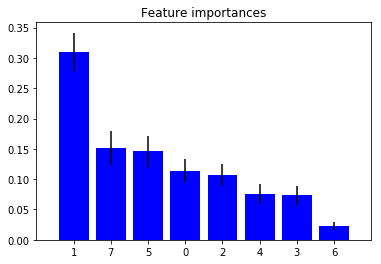

In [12]:
X = data.iloc[:,0:8]
y = data['Outcome']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,max_features=None,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking for all factors:")

for f in range(X.shape[1]):
    print("%d. feature %d : %f" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest 
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()